<a href="https://colab.research.google.com/github/StrideEric/Analisis_de_datos_Informatorio_2025/blob/master/Laboratorio_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objetivo del Laboratorio
El objetivo de este laboratorio es aplicar de manera integrada las competencias adquiridas durante la especialización en Análisis de Datos, desarrollando un proceso completo de análisis que incluya:

Extracción, Transformación y Carga (ETL) de un conjunto de datos de su elección.

Análisis Exploratorio de Datos (EDA) utilizando Python y pandas.

Interpretación analítica respondiendo tres preguntas de negocio basadas en la exploración.

Publicación del trabajo en un repositorio de GitHub, con un enlace funcional a un Google Colab Notebook ejecutable.

Requerimientos Técnicos
Lenguaje: Python

Librerías principales:

Pandas

SQLAlchemy

Entorno: Google Colab

Repositorio: GitHub (público)

# Dataset Utilizado
https://www.kaggle.com/datasets/azminetoushikwasi/-lionel-messi-all-club-goals

# 1. ETL – Extracción, Transformación y Carga

**Consigna**

---

Seleccioná un dataset de fuente pública (por ejemplo: Kaggle, datos.gob.ar
, o cualquier API abierta).

En tu notebook, deberás:

Extraer: importar el dataset a tu entorno (puede ser CSV, Excel, SQL o API).

Transformar:

Limpiar valores faltantes y duplicados.

Corregir tipos de datos.

Generar nuevas variables derivadas (por ejemplo, indicadores, ratios o categorías).

Cargar: dejar listo el DataFrame final para análisis, documentando el proceso.

💡 Sugerencia: incluí celdas con comentarios explicativos sobre cada paso ETL.



## 1. Extracción (Extract)

In [ ]:
from google.colab import drive
import pandas as pd
import chardet

drive.mount('/content/drive', force_remount=True)

ruta_archivo = '/content/drive/MyDrive/Curso Análisis de Datos - Informatorio/data_laboratorio_1.csv'
with open(ruta_archivo, 'rb') as f:
  result = chardet.detect(f.read())
  encoding = result['encoding']

# Leer el archivo CSV con el encoding detectado

try:
  df = pd.read_csv(ruta_archivo, encoding=encoding, sep=",", decimal=".")
  print("La extraccion se realizo correctamente")
except FileNotFoundError:
  print(f"El archivo no se encontro en la ruta especificada {ruta_archivo}")
except Exception as e:
  print(f"Ocurrio un error:{e}")

Mounted at /content/drive
La extraccion se realizo correctamente


## 2. Transformación (Transform)

In [ ]:
# Observamos las 100 primeras filas de nuestro dataset para las columnas, los datos que contienen y si se cargo correctamente
df.head(100)


,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,04/05,LaLiga,34,05-01/05,H,FC Barcelona,Albacete Balompie,2:00,CF,90+1,2:00,Left-footed shot,Ronaldinho Gaacho
1,05/06,UEFA Champions League,Group Stage,11-02/05,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,3:00,Left-footed shot,NaN
2,05/06,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:01,RW,51,2:00,Left-footed shot,Samuel Etoo
3,05/06,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:01,RW,50,2:01,Left-footed shot,Mark van Bommel
4,05/06,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:00,CF,82,2:00,Left-footed shot,Ronaldinho Gaacho
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,09/10,FIFA Club World Cup,Final,12/19/09,A,FC Barcelona,Club Estudiantes de La Plata,1:2 AET,RW,110,1:02,Chest,Dani Alves
96,09/10,LaLiga,17,01/10/10,A,FC Barcelona,CD Tenerife,0:05,RW,36,0:01,Left-footed shot,Bojan Krkic
97,09/10,LaLiga,17,01/10/10,A,FC Barcelona,CD Tenerife,0:05,RW,45,0:03,Right-footed shot,Bojan Krkic
98,09/10,LaLiga,17,01/10/10,A,FC Barcelona,CD Tenerife,0:05,RW,75,0:04,Left-footed shot,Bojan Krkic


In [ ]:
# Modificamos la columna de fechas para estandarizar a un formato datetime, para solucionar esto tenemos que definir una funcion parse_date para convertir cada valor de la columna Date en un datetime
def parse_date(date_str):
    date_str = str(date_str).strip()  # Primero guardamos como un string y sin espacios en blanco (por si llegan a haber) en la variable date_str

    # Algunos tienen formato "MM-DD/YY" y convertimos todo a "MM/DD/YY"
    if '-' in date_str:
        date_str = date_str.replace('-', '/')

    #Devolvemos el valor del a columna con el formato standar de datetime
    return pd.to_datetime(date_str, format='%m/%d/%y')


# Aplicamos la función y borramos la columna Date que no vamos a utilizar mas.
try:
  df["Date_correct"] = df["Date"].apply(parse_date)
  df.drop(columns=["Date"], inplace=True)
except Exception as e:
  print(f"Ocurrio un error, columna {e} no esta disponible.")


df.head(100)

,Season,Competition,Matchday,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist,Date_correct
0,04/05,LaLiga,34,H,FC Barcelona,Albacete Balompie,2:00,CF,90+1,2:00,Left-footed shot,Ronaldinho Gaacho,2005-05-01
1,05/06,UEFA Champions League,Group Stage,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,3:00,Left-footed shot,NaN,2005-11-02
2,05/06,LaLiga,13,H,FC Barcelona,Racing Santander,4:01,RW,51,2:00,Left-footed shot,Samuel Etoo,2005-11-27
3,05/06,LaLiga,19,H,FC Barcelona,Athletic Bilbao,2:01,RW,50,2:01,Left-footed shot,Mark van Bommel,2006-01-15
4,05/06,LaLiga,20,H,FC Barcelona,Deportivo Alaves,2:00,CF,82,2:00,Left-footed shot,Ronaldinho Gaacho,2006-01-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,09/10,FIFA Club World Cup,Final,A,FC Barcelona,Club Estudiantes de La Plata,1:2 AET,RW,110,1:02,Chest,Dani Alves,2009-12-19
96,09/10,LaLiga,17,A,FC Barcelona,CD Tenerife,0:05,RW,36,0:01,Left-footed shot,Bojan Krkic,2010-01-10
97,09/10,LaLiga,17,A,FC Barcelona,CD Tenerife,0:05,RW,45,0:03,Right-footed shot,Bojan Krkic,2010-01-10
98,09/10,LaLiga,17,A,FC Barcelona,CD Tenerife,0:05,RW,75,0:04,Left-footed shot,Bojan Krkic,2010-01-10


In [ ]:
import numpy as np

# Cambiamos el tipo de dato de las columnas del df
# Pasamos las posibles a category para ahorrar memoria (en este caso al ser pocos registros no influye mucho pero si son cientos de miles si se va a notar)
df["Season"] = df["Season"].astype("category")
df["Competition"] = df["Competition"].astype("category")
df["Venue"] = df["Venue"].astype("category")
df["Club"] = df["Club"].astype("category")
df["Opponent"] = df["Opponent"].astype("category")
df["Playing_Position"] = df["Playing_Position"].astype("category")
df["Type"] = df["Type"].astype("category")
df["Goal_assist"] = df["Goal_assist"].astype("category")

# Separo Matchady en los campos numericos y string para, en caso de necesitar,
# poder operar con ellos de una forma mas sencilla.
df["Matchday_label"] = df["Matchday"].where(~df["Matchday"].str.isnumeric(), None) #  la parte no numérica
df["Matchday_num"] = pd.to_numeric(df["Matchday"], errors="coerce").astype("Int64") #  la parte numérica

# Limpio los campos y separo los goles de local y visitante.
df[["Result_clean", "Extra_info"]] = df["Result"].str.extract(r"^(\d+:\d+)\s*(.*)?$").replace('', np.nan)

# Separo los valores de la columna para goles de los locales y goles de los visitantes
df[["Goals_home_team", "Goals_away_team"]] = df["Result_clean"].str.split(":", expand=True).astype(int)

# Separo los valores dentro de la columa minutes en caso de que haya tiempo extra.
df["Minute"] = df["Minute"].astype(str).str.strip()
df[["Minute_base", "Minute_added"]] = df["Minute"].str.split("+", expand=True)
# Convertir a número (maneja celdas sin '+', donde la parte added será 0).
df["Minute_base"] = pd.to_numeric(df["Minute_base"], errors="coerce").astype("Int64")
df["Minute_added"] = pd.to_numeric(df["Minute_added"], errors="coerce").fillna(0).astype("Int64")

# separo los valores de las columnas para resultado actual despues del gol convertido.
df[["At_score_home", "At_score_away"]] = df["At_score"].str.split(":", expand=True).astype(int)

df.head(100)


,Season,Competition,Matchday,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,...,Matchday_label,Matchday_num,Result_clean,Extra_info,Goals_home_team,Goals_away_team,Minute_base,Minute_added,At_score_home,At_score_away
0,04/05,LaLiga,34,H,FC Barcelona,Albacete Balompie,2:00,CF,90+1,2:00,...,None,34,2:00,NaN,2,0,90,1,2,0
1,05/06,UEFA Champions League,Group Stage,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,3:00,...,Group Stage,<NA>,5:00,NaN,5,0,34,0,3,0
2,05/06,LaLiga,13,H,FC Barcelona,Racing Santander,4:01,RW,51,2:00,...,None,13,4:01,NaN,4,1,51,0,2,0
3,05/06,LaLiga,19,H,FC Barcelona,Athletic Bilbao,2:01,RW,50,2:01,...,None,19,2:01,NaN,2,1,50,0,2,1
4,05/06,LaLiga,20,H,FC Barcelona,Deportivo Alaves,2:00,CF,82,2:00,...,None,20,2:00,NaN,2,0,82,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,09/10,FIFA Club World Cup,Final,A,FC Barcelona,Club Estudiantes de La Plata,1:2 AET,RW,110,1:02,...,Final,<NA>,1:2,AET,1,2,110,0,1,2
96,09/10,LaLiga,17,A,FC Barcelona,CD Tenerife,0:05,RW,36,0:01,...,None,17,0:05,NaN,0,5,36,0,0,1
97,09/10,LaLiga,17,A,FC Barcelona,CD Tenerife,0:05,RW,45,0:03,...,None,17,0:05,NaN,0,5,45,0,0,3
98,09/10,LaLiga,17,A,FC Barcelona,CD Tenerife,0:05,RW,75,0:04,...,None,17,0:05,NaN,0,5,75,0,0,4


In [ ]:
# Ahora eliminamos las columnas que no utilizamos mas y ordenamos el resto para que quede todo legible

# Eliminamos las columnas ya tratadas que no vamos a necesitar mas.
df = df.drop(columns=[
    "Matchday",
    "Result",
    "Minute",
    "Result_clean",
    "At_score",
], errors="ignore")

# Traducimos los nombres desde el Ingles a Español (Vamos a suponer que necesitamos exponer el trabajo con personas que solo hablen Español).
df = df.rename(columns={
    "Season": "Temporada",
    "Competition": "Competición",
    "Venue": "Condición",             # Local o visitante
    "Club": "Equipo_local",
    "Opponent": "Equipo_visitante",
    "Extra_info": "Info_partido",     # Ej: AET, PEN...
    "Goals_home_team": "Goles_local",
    "Goals_away_team": "Goles_visitante",
    "Playing_Position": "Posición",
    "Minute_base": "Minuto",
    "Minute_added": "Minuto_adicional",
    "Goal_assist": "Asistencia_de",
    "Date_correct": "Fecha",
    "At_score_home": "Resultado_actual_local",
    "At_score_away": "Resultado_actual_visitante",
    "Matchday_label": "Fase_competición",
    "Matchday_num": "Jornada"
})

# Ordenamos las columnas.
column_order = [
    "Temporada",
    "Competición",
    "Fase_competicióm",
    "Jornada_liga",
    "Fecha",
    "Condición",
    "Equipo_local",
    "Equipo_visitante",
    "Goles_local",
    "Goles_visitante",
    "Info_partido",
    "Resultado_actual_local",
    "Resultado_actual_visitante",
    "Posición",
    "Asistencia_de",
    "Minuto",
    "Minuto_adicional",
    "Fase_tiempo"
]

# Por ultimo guardamos el nuevo orden en el DataFrame
df = df[[c for c in column_order if c in df.columns]]

df.head(100)

,Temporada,Competición,Fecha,Condición,Equipo_local,Equipo_visitante,Goles_local,Goles_visitante,Info_partido,Resultado_actual_local,Resultado_actual_visitante,Posición,Asistencia_de,Minuto,Minuto_adicional
0,04/05,LaLiga,2005-05-01,H,FC Barcelona,Albacete Balompie,2,0,NaN,2,0,CF,Ronaldinho Gaacho,90,1
1,05/06,UEFA Champions League,2005-11-02,H,FC Barcelona,Panathinaikos Athens,5,0,NaN,3,0,RW,NaN,34,0
2,05/06,LaLiga,2005-11-27,H,FC Barcelona,Racing Santander,4,1,NaN,2,0,RW,Samuel Etoo,51,0
3,05/06,LaLiga,2006-01-15,H,FC Barcelona,Athletic Bilbao,2,1,NaN,2,1,RW,Mark van Bommel,50,0
4,05/06,LaLiga,2006-01-22,H,FC Barcelona,Deportivo Alaves,2,0,NaN,2,0,CF,Ronaldinho Gaacho,82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,09/10,FIFA Club World Cup,2009-12-19,A,FC Barcelona,Club Estudiantes de La Plata,1,2,AET,1,2,RW,Dani Alves,110,0
96,09/10,LaLiga,2010-01-10,A,FC Barcelona,CD Tenerife,0,5,NaN,0,1,RW,Bojan Krkic,36,0
97,09/10,LaLiga,2010-01-10,A,FC Barcelona,CD Tenerife,0,5,NaN,0,3,RW,Bojan Krkic,45,0
98,09/10,LaLiga,2010-01-10,A,FC Barcelona,CD Tenerife,0,5,NaN,0,4,RW,Bojan Krkic,75,0


## Carga (Load)

In [ ]:
# Guardamos el archivo modificado
ruta_salida = '/content/drive/MyDrive/Curso Análisis de Datos - Informatorio/data_laboratorio_1_Modificada.csv'

df.to_csv(ruta_salida, index=False, sep=",")

print(f"Archivo CSV guardado con exito en: {ruta_salida}")

Archivo CSV guardado con exito en: /content/drive/MyDrive/Curso Análisis de Datos - Informatorio/data_laboratorio_1_Modificada.csv


# 2. EDA (Analisis Exploratorio de Datos)

**Consigna**

---

Realizá un análisis que permita conocer, visualizar y comprender las relaciones dentro del dataset.

El EDA debe incluir:

Análisis de la estructura de datos (info(), describe(), tipos de variables, etc.).

Interpretación textual de los hallazgos.

In [ ]:
# Tamaño del DataFrame
print("Dimensiones del DataFrame\n > Filas:", df.shape[0], "\n > Columnas:",df.shape[1])
print("\n")

# Primeras filas
print("Presentación de primeros valores del DataFrame")
display(df.head())
print("\n")

# Información general de las columnas
print("Presentación de información general de las columnas")
df.info()
print("\n")

# Descripción de las variables numéricas
print("Descripción de las variables numéricas")
display(df.describe())
print("\n")

# Descripción de las variables categóricas
print("Descripción de las variables categóricas")
display(df.describe(include=["object", "category"]))
print("\n")

# Porcentajes de valores nulos y ceros por columna
print("Presentación de los porcentajes de valores nulos y ceros por columna\n")
null_porc = (df.isnull().mean() * 100).round(2)
zero_porc = ((df == 0).sum() / len(df) * 100).round(2)
valores = pd.DataFrame({"Porcentaje_nulos": null_porc, "Porcentaje_ceros": zero_porc})
display(valores)

Dimensiones del DataFrame
 > Filas: 704 
 > Columnas: 15


Presentación de primeros valores del DataFrame


,Temporada,Competición,Fecha,Condición,Equipo_local,Equipo_visitante,Goles_local,Goles_visitante,Info_partido,Resultado_actual_local,Resultado_actual_visitante,Posición,Asistencia_de,Minuto,Minuto_adicional
0,04/05,LaLiga,2005-05-01,H,FC Barcelona,Albacete Balompie,2,0,NaN,2,0,CF,Ronaldinho Gaacho,90,1
1,05/06,UEFA Champions League,2005-11-02,H,FC Barcelona,Panathinaikos Athens,5,0,NaN,3,0,RW,NaN,34,0
2,05/06,LaLiga,2005-11-27,H,FC Barcelona,Racing Santander,4,1,NaN,2,0,RW,Samuel Etoo,51,0
3,05/06,LaLiga,2006-01-15,H,FC Barcelona,Athletic Bilbao,2,1,NaN,2,1,RW,Mark van Bommel,50,0
4,05/06,LaLiga,2006-01-22,H,FC Barcelona,Deportivo Alaves,2,0,NaN,2,0,CF,Ronaldinho Gaacho,82,0




Presentación de información general de las columnas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Temporada                   704 non-null    category      
 1   Competición                 704 non-null    category      
 2   Fecha                       704 non-null    datetime64[ns]
 3   Condición                   704 non-null    category      
 4   Equipo_local                704 non-null    category      
 5   Equipo_visitante            704 non-null    category      
 6   Goles_local                 704 non-null    int64         
 7   Goles_visitante             704 non-null    int64         
 8   Info_partido                3 non-null      object        
 9   Resultado_actual_local      704 non-null    int64         
 10  Resultado_actual_visitante  704 non-null    int64         
 11  Posi

,Fecha,Goles_local,Goles_visitante,Resultado_actual_local,Resultado_actual_visitante,Minuto,Minuto_adicional
count,704,704.000000,704.000000,704.000000,704.000000,704.0,704.0
mean,2014-08-23 04:13:38.181818112,2.671875,1.779830,1.629261,1.137784,51.828125,0.09517
min,2005-05-01 00:00:00,0.000000,0.000000,0.000000,0.000000,3.0,0.0
25%,2011-04-21 06:00:00,1.000000,0.000000,0.000000,0.000000,30.0,0.0
50%,2014-04-23 12:00:00,2.000000,1.000000,1.000000,1.000000,54.0,0.0
75%,2018-01-11 00:00:00,4.000000,3.000000,3.000000,2.000000,75.0,0.0
max,2023-03-04 00:00:00,8.000000,8.000000,8.000000,7.000000,110.0,5.0
std,NaN,1.995444,1.697154,1.480185,1.299762,25.815083,0.492654




Descripción de las variables categóricas


,Temporada,Competición,Condición,Equipo_local,Equipo_visitante,Info_partido,Posición,Asistencia_de
count,704,704,704,704,704,3,704,490
unique,19,10,2,2,98,1,9,71
top,11-Dec,LaLiga,H,FC Barcelona,Sevilla FC,AET,CF,Luis Suarez
freq,73,474,420,672,38,3,276,48




Presentación de los porcentajes de valores nulos y ceros por columna



,Porcentaje_nulos,Porcentaje_ceros
Temporada,0.00,0.0
Competición,0.00,0.0
Fecha,0.00,0.0
Condición,0.00,0.0
Equipo_local,0.00,0.0
Equipo_visitante,0.00,0.0
Goles_local,0.00,17.76
Goles_visitante,0.00,26.85
Info_partido,99.57,0.0
Resultado_actual_local,0.00,26.7


El dataset contiene 704 registros y 15 variables. La mayoría de las columnas son categóricas relacionadas con la competencia, el equipo y la posición del jugador.
Se observa que las columnas “Asistencia_de”, “Info_partido” y "Minuto_adicional" contienen valores faltantes (nulos o vacios) lo cual es esperable debido a que no todos los goles tienen registro de asistencia, prórroga o goles en minutos adicionales.
Tambienn las columnas de Goles, por que no hay goles de ambos equipos en todos los partidos.

# 3. Preguntas de Negocio

Formulá y respondé tres preguntas de negocio basadas en el dataset seleccionado.
Cada pregunta debe poder responderse con un análisis descriptivo y visualización clara.

Ejemplos:

¿Qué categoría de producto tiene mayor volumen de ventas promedio por mes?

¿Cómo evoluciona la cantidad de usuarios activos a lo largo del año?

¿Qué relación existe entre el precio y la satisfacción del cliente?

✅ Cada respuesta debe incluir:

Tabla con la evidencia.

Breve interpretación del resultado.

In [ ]:
# Libreria utilizada para realizar los graficos.

import matplotlib.pyplot as plt


/tmp/ipython-input-1621672750.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla_competicion = df.groupby("Competición")[["Goles_local", "Goles_visitante"]].sum()


,Goles_local,Goles_visitante
Competición,,
Champions League,1,3
Copa del Rey,170,67
FIFA Club World Cup,2,16
LaLiga,1270,906
Ligue 1,30,63
Supercopa,38,16
Trophée des Champions,4,0
Troph�e des Champions,4,0
UEFA Champions League,350,174


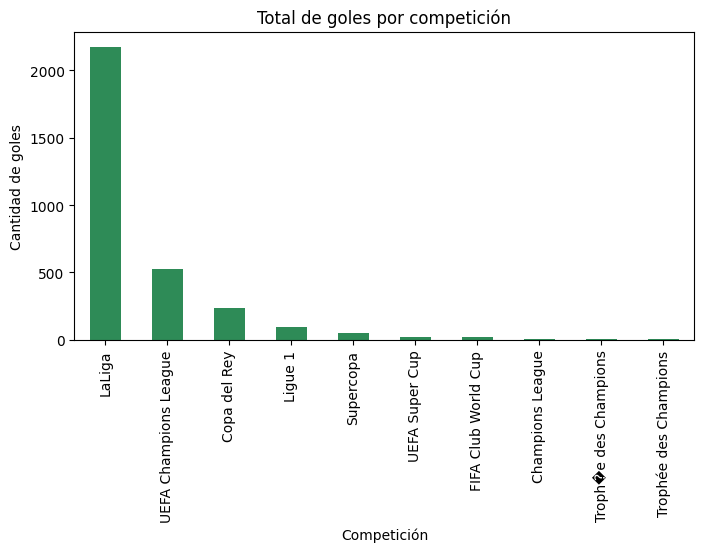

In [ ]:
# ¿Qué competiciones presentan mayor cantidad de goles?
tabla_competicion = df.groupby("Competición")[["Goles_local", "Goles_visitante"]].sum()
display(tabla_competicion)

tabla_competicion.sum(axis=1).sort_values(ascending=False).plot(kind="bar", figsize=(8,4), color="seagreen")
plt.title("Total de goles por competición")
plt.xlabel("Competición")
plt.ylabel("Cantidad de goles")
plt.show()

La LaLiga muestra la mayor cantidad total de goles, seguida por competiciones como la Champions League y la Copa del Rey.
Esto puede explicarse porque la liga tiene más partidos por temporada, lo que incrementa naturalmente el volumen de goles registrados.

,count
Equipo_visitante,
Sevilla FC,38
Atletico de Madrid,32
Valencia CF,31
Athletic Bilbao,29
Real Madrid,26
Real Betis Balompie,26
CA Osasuna,25
RCD Espanyol Barcelona,25
Levante UD,24


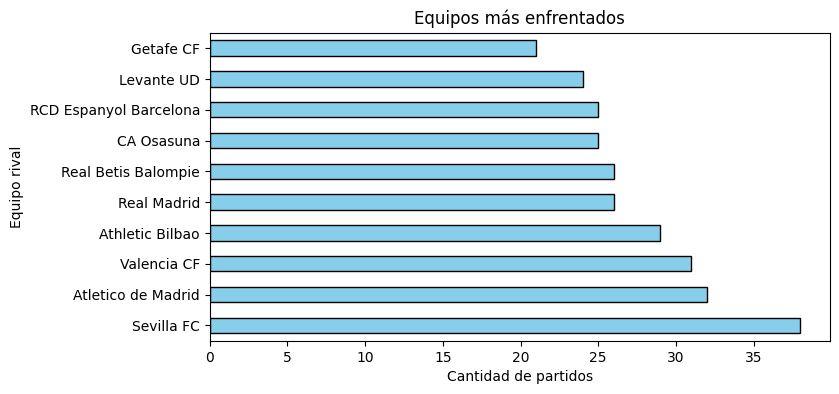

In [ ]:
# ¿Contra qué equipos jugó más partidos en contra?
tabla_oponentes = df["Equipo_visitante"].value_counts().head(10)
display(tabla_oponentes)
tabla_oponentes.plot(kind="barh", figsize=(8,4), color="skyblue", edgecolor="black")
plt.title("Equipos más enfrentados")
plt.xlabel("Cantidad de partidos")
plt.ylabel("Equipo rival")
plt.show()

El jugador disputó más encuentros contra equipos como Atlético de Madrid y Sevilla, lo cual refleja su participación constante en la liga española y competiciones nacionales.

,% de victorias
Local,91.428571
Visitante,85.563380


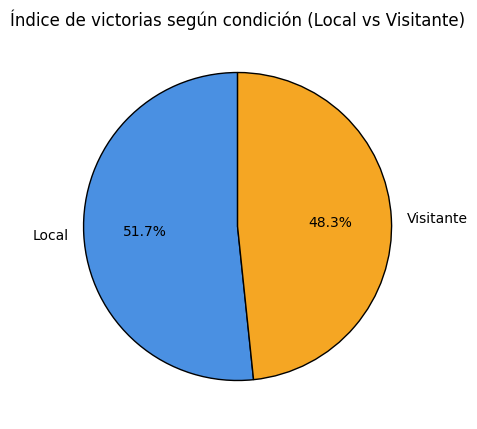

In [ ]:
# ¿Cuál es el índice de victorias de local y visitante?
# Suponemos que el resultado está desde la perspectiva del equipo de Messi

df["Victoria_local"] = df["Goles_local"] > df["Goles_visitante"]
df["Victoria_visitante"] = df["Goles_visitante"] > df["Goles_local"]

indice_victorias = {
    "Local": df.loc[df["Condición"] == "H", "Victoria_local"].mean() * 100,
    "Visitante": df.loc[df["Condición"] == "A", "Victoria_visitante"].mean() * 100
}

tabla_victorias = pd.DataFrame.from_dict(indice_victorias, orient="index", columns=["% de victorias"])
display(tabla_victorias)

plt.figure(figsize=(5,5))
plt.pie(
    tabla_victorias["% de victorias"],
    labels=tabla_victorias.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=["#4A90E2", "#F5A623"],
    wedgeprops={"edgecolor": "black"}
)
plt.title("Índice de victorias según condición (Local vs Visitante)")
plt.show()

El índice de victorias como local es superior al de visitante, lo cual confirma la ventaja de jugar en casa: mayor control, público a favor y dominio del entorno.

In [ ]:
# ¿Cuántos goles hizo en tiempo extra (minuto_adicional ≠ 0)?
goles_extra = df.loc[df["Minuto_adicional"] > 0].shape[0]
goles_totales = df.shape[0]
porcentaje_extra = round((goles_extra / goles_totales) * 100, 2)

print(f"Goles en tiempo añadido: {goles_extra} ({porcentaje_extra}%)")

Goles en tiempo añadido: 33 (4.69%)


Aproximadamente un 4.69 % de los goles fueron convertidos en tiempo añadido, lo cual muestra la persistencia del jugador para marcar incluso en los minutos finales del encuentro.

,count
Año,
2019,45
2020,26
2021,34
2022,20
2023,6


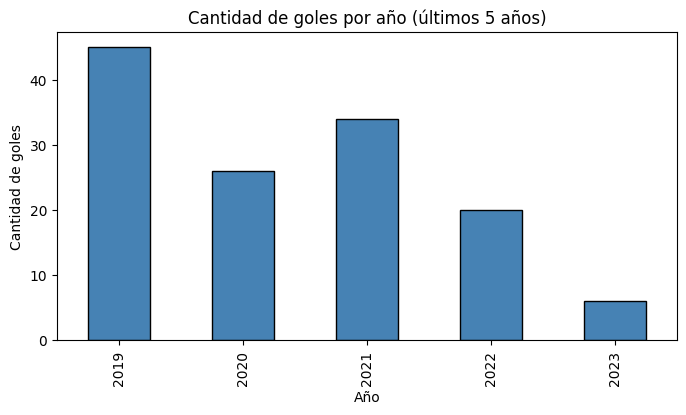

In [ ]:
# ¿Cuántos goles hizo por año en los últimos 5 años?
# Aseguramos que la fecha esté en formato datetime
df["Fecha"] = pd.to_datetime(df["Fecha"], errors="coerce", dayfirst=True)
df["Año"] = df["Fecha"].dt.year

goles_por_año = df["Año"].value_counts().sort_index().tail(5)
display(goles_por_año)

goles_por_año.plot(kind="bar", figsize=(8,4), color="steelblue", edgecolor="black")
plt.title("Cantidad de goles por año (últimos 5 años)")
plt.xlabel("Año")
plt.ylabel("Cantidad de goles")
plt.show()

Se observa una leve disminución en los últimos años, coincidiendo con la etapa final del jugador en el FC Barcelona y su transición a otros clubes, aunque mantiene una alta cantidad de goles.

/tmp/ipython-input-2145740826.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tabla_goles = pd.pivot_table(


Condición,A,H,Total
Competición,,,
LaLiga,197,277,474
UEFA Champions League,48,80,128
Copa del Rey,19,37,56
Ligue 1,12,9,21
Supercopa,2,12,14
FIFA Club World Cup,5,0,5
UEFA Super Cup,0,3,3
Champions League,1,0,1
Troph�e des Champions,0,1,1


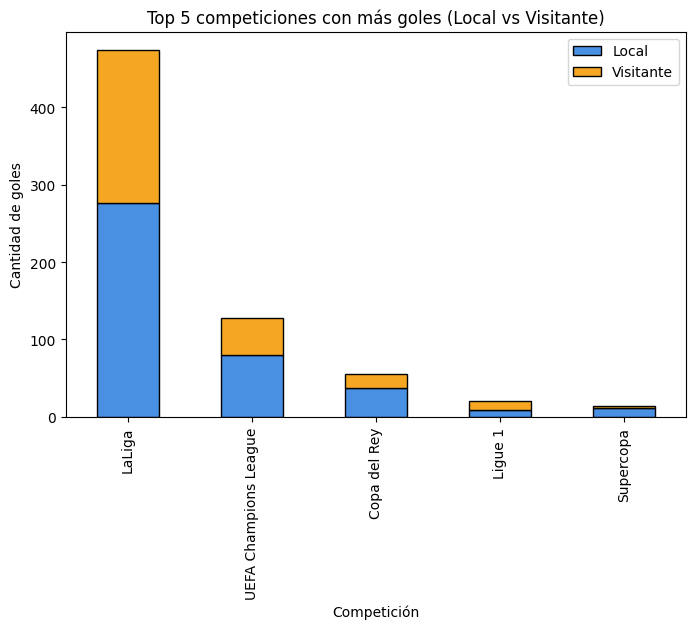

In [ ]:
# Cantidad de goles por condición y competición
tabla_goles = pd.pivot_table(
    df,
    values="Goles_local",
    index="Competición",
    columns="Condición",
    aggfunc="count",
    fill_value=0
)

# Agregamos una columna total y mostramos TODAS las competiciones.
tabla_goles["Total"] = tabla_goles.sum(axis=1)
display(tabla_goles.sort_values("Total", ascending=False))

# Preparamos el Top 5 solo para el gráfico.
tabla_top5 = tabla_goles.sort_values("Total", ascending=False).head(5)

# Gráfico de barras apiladas solo con las 5 competiciones principales.
tabla_top5[["H", "A"]].plot(
    kind="bar",
    stacked=True,
    figsize=(8,5),
    color=["#4A90E2", "#F5A623"],
    edgecolor="black"
)
plt.title("Top 5 competiciones con más goles (Local vs Visitante)")
plt.xlabel("Competición")
plt.ylabel("Cantidad de goles")
plt.legend(["Local", "Visitante"])
plt.show()

Cuántos goles se anotaron en cada competición, diferenciando si el jugador jugó de local (H) o visitante (A). En la grafica solo mostramos el top 5 de competiciones para facilitar la lectura.

/tmp/ipython-input-3404596949.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tabla_asistencias = pd.pivot_table(


Competición,Champions League,Copa del Rey,FIFA Club World Cup,LaLiga,Ligue 1,Supercopa,Trophée des Champions,Troph�e des Champions,UEFA Champions League,UEFA Super Cup,Total_asistencias
Asistencia_de,,,,,,,,,,,
Luis Suarez,0,2,0,34,0,2,0,0,10,0,48
Dani Alves,0,3,2,27,0,1,0,0,9,0,42
Andres Iniesta,0,5,0,20,0,1,0,0,13,0,39
Xavi,0,4,1,21,0,1,0,0,7,0,34
Neymar,0,2,1,16,4,0,0,0,7,0,30
Pedro,0,2,0,22,0,0,0,0,5,0,29
Jordi Alba,0,5,0,16,0,0,0,0,2,0,23
Sergio Busquets,0,0,0,16,0,0,0,0,3,0,19
Ivan Rakitic,0,2,0,14,0,0,0,0,3,0,19


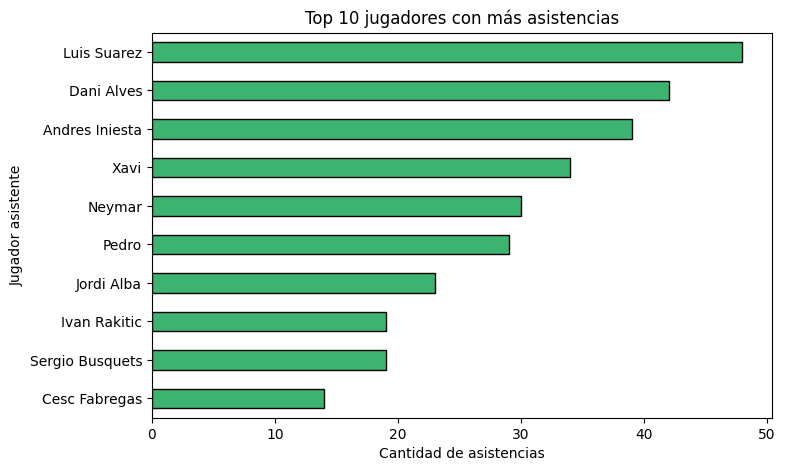

In [ ]:
# Asistencias por jugador y competición.
# Tabla dinámica: cantidad de asistencias por jugador y competición.
tabla_asistencias = pd.pivot_table(
    df,
    values="Goles_local",
    index="Asistencia_de",
    columns="Competición",
    aggfunc="count",
    fill_value=0
)

# Agregamos el total general.
tabla_asistencias["Total_asistencias"] = tabla_asistencias.sum(axis=1)

# Mostramos los 10 primeros.
top_asistencias = tabla_asistencias.sort_values("Total_asistencias", ascending=False).head(10)
display(top_asistencias)

# Gráfico de barras horizontales.
top_asistencias["Total_asistencias"].sort_values().plot(
    kind="barh",
    figsize=(8,5),
    color="#3CB371",
    edgecolor="black"
)
plt.title("Top 10 jugadores con más asistencias")
plt.xlabel("Cantidad de asistencias")
plt.ylabel("Jugador asistente")
plt.show()


El jugador con mayor número de asistencias es Luis Suarez, seguido por Dani Alves e Iniesta, quienes suman la mayor cantidad de pases de gol hacia Messi, especialmente en competiciones como LaLiga y Champions League.


# 4. Publicación y Entrega


Subí tu notebook a GitHub.

Incluí un enlace en el README.md que permita abrir el notebook en Google Colab con el botón:


[![Abrir en Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tu_usuario/tu_repo/blob/main/tu_notebook.ipynb)
Compartí el enlace del repositorio en el aula virtual como entrega final.

Requisitos Mínimos para la Aprobación
Proceso ETL completo, documentado y funcional.

Uso correcto de pandas para transformación y limpieza.

EDA con al menos 3 visualizaciones significativas.

Formulación y respuesta de 3 preguntas de negocio con interpretación.

Notebook correctamente comentado, con estructura clara y profesional.

Repositorio en GitHub con enlace a Colab funcional.